In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import seaborn as sns 

/home/iain/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df_orig = df

In [4]:
pd.set_option('display.max_columns', None)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
df[df.duplicated() == True]
#No duplicate rows 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


In [7]:
df.isnull().sum()
#No null values 

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
list_categoricals = ["Marital status", "Application mode", "Application order", "Course", "Daytime/evening attendance\t",
                   "Previous qualification", "Nacionality", "Mother's qualification",
                   "Father's qualification", "Mother's occupation", "Father's occupation","Displaced",
                   "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder",
                   "International", "Target"]

list_numericals = ["Previous qualification (grade)", "Admission grade", "Age at enrollment","Curricular units 1st sem (credited)",
                 "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
                 "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)",
                 "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
                 "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate",
                 "GDP"]

list_numericals_modded = ["Admission grade", "Age at enrollment",
                    "Curricular units 1st sem (without evaluations)", "Curricular units 1st sem (grade)",
                    "Curricular units 2nd sem (without evaluations)", "Curricular units 2nd sem (grade)",
                    "Unemployment rate", "Inflation rate", "GDP"]

In [9]:
def int_to_string(df, list_of_categoricals):
    for category in list_of_categoricals:
        df = df.astype({str(category) : "string"})
    return df

In [10]:
df = int_to_string(df,list_categoricals)

In [11]:
df.dtypes

Marital status                                    string[python]
Application mode                                  string[python]
Application order                                 string[python]
Course                                            string[python]
Daytime/evening attendance\t                      string[python]
Previous qualification                            string[python]
Previous qualification (grade)                           float64
Nacionality                                       string[python]
Mother's qualification                            string[python]
Father's qualification                            string[python]
Mother's occupation                               string[python]
Father's occupation                               string[python]
Admission grade                                          float64
Displaced                                         string[python]
Educational special needs                         string[python]
Debtor                   

In [12]:
in_df = []
for column in df.columns:
    if column in list_categoricals or list_numericals:
        in_df.append("True")
    else:
        in_df.append("False")


df_variables_dict = {}

for feature in list_categoricals:
    df_variables_dict[feature] = "categorical"
for feature in list_numericals:
    df_variables_dict[feature] = "numerical"

df_variables_dict

{'Marital status': 'categorical',
 'Application mode': 'categorical',
 'Application order': 'categorical',
 'Course': 'categorical',
 'Daytime/evening attendance\t': 'categorical',
 'Previous qualification': 'categorical',
 'Nacionality': 'categorical',
 "Mother's qualification": 'categorical',
 "Father's qualification": 'categorical',
 "Mother's occupation": 'categorical',
 "Father's occupation": 'categorical',
 'Displaced': 'categorical',
 'Educational special needs': 'categorical',
 'Debtor': 'categorical',
 'Tuition fees up to date': 'categorical',
 'Gender': 'categorical',
 'Scholarship holder': 'categorical',
 'International': 'categorical',
 'Target': 'categorical',
 'Previous qualification (grade)': 'numerical',
 'Admission grade': 'numerical',
 'Age at enrollment': 'numerical',
 'Curricular units 1st sem (credited)': 'numerical',
 'Curricular units 1st sem (enrolled)': 'numerical',
 'Curricular units 1st sem (evaluations)': 'numerical',
 'Curricular units 1st sem (approved)': 

<Axes: >

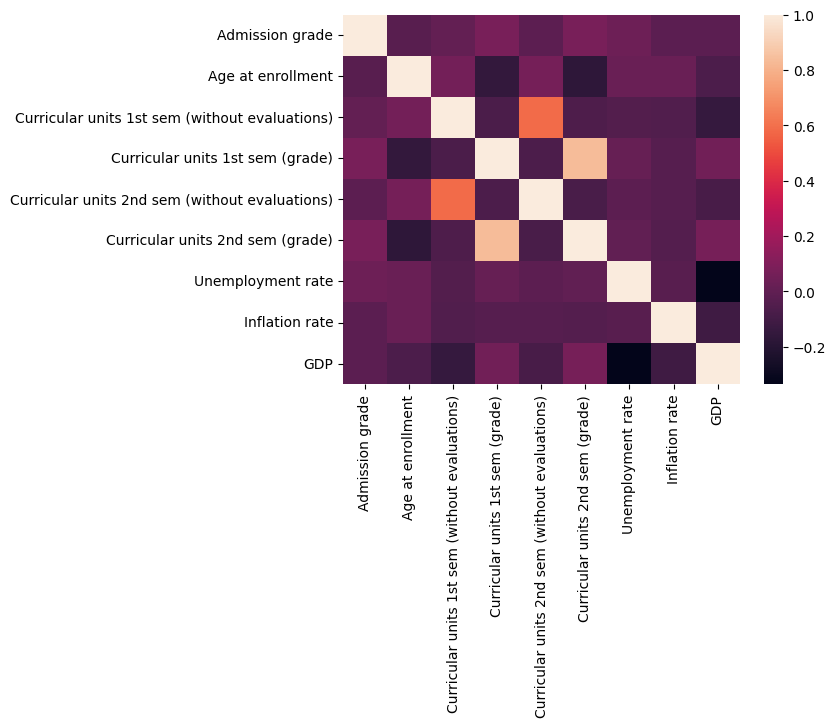

In [13]:
df_num_corr_mat = df[list_numericals_modded].corr()
sns.heatmap(df_num_corr_mat)

In [14]:
df_num_corr_mat

,Admission grade,Age at enrollment,Curricular units 1st sem (without evaluations),Curricular units 1st sem (grade),Curricular units 2nd sem (without evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
Admission grade,1.000000,-0.029915,0.009033,0.073868,-0.013254,0.074402,0.038756,-0.021624,-0.019519
Age at enrollment,-0.029915,1.000000,0.057470,-0.156616,0.061654,-0.173419,0.025018,0.025377,-0.064678
Curricular units 1st sem (without evaluations),0.009033,0.057470,1.000000,-0.071660,0.583261,-0.061482,-0.045144,-0.052534,-0.144673
Curricular units 1st sem (grade),0.073868,-0.156616,-0.071660,1.000000,-0.066076,0.837170,0.014821,-0.033904,0.054801
Curricular units 2nd sem (without evaluations),-0.013254,0.061654,0.583261,-0.066076,1.000000,-0.079216,-0.013960,-0.034391,-0.080292
Curricular units 2nd sem (grade),0.074402,-0.173419,-0.061482,0.837170,-0.079216,1.000000,0.001462,-0.038166,0.071269
Unemployment rate,0.038756,0.025018,-0.045144,0.014821,-0.013960,0.001462,1.000000,-0.028885,-0.335178
Inflation rate,-0.021624,0.025377,-0.052534,-0.033904,-0.034391,-0.038166,-0.028885,1.000000,-0.112295
GDP,-0.019519,-0.064678,-0.144673,0.054801,-0.080292,0.071269,-0.335178,-0.112295,1.000000


In [15]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [16]:
df.drop(["Curricular units 1st sem (credited)","Curricular units 1st sem (approved)",
         "Curricular units 1st sem (evaluations)","Curricular units 1st sem (enrolled)",
         "Curricular units 2nd sem (credited)","Curricular units 2nd sem (approved)",
         "Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (enrolled)"], axis = 1, inplace = True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_numericals_modded = df[list_numericals_modded]
vif_info = pd.DataFrame()
vif_info["feature"] = list_numericals_modded
vif_info["vif"] = [variance_inflation_factor(df_numericals_modded.values, i)
                          for i in range(len(df_numericals_modded.columns))]

In [18]:
vif_info
#vif_info shows severe signs of multicollinearity, need to delete a few of these variables 

,feature,vif
0,Admission grade,27.887104
1,Age at enrollment,9.604651
2,Curricular units 1st sem (without evaluations),1.621535
3,Curricular units 1st sem (grade),19.430992
4,Curricular units 2nd sem (without evaluations),1.583570
5,Curricular units 2nd sem (grade),16.395028
6,Unemployment rate,18.991207
7,Inflation rate,1.801587
8,GDP,1.151602


<Axes: >

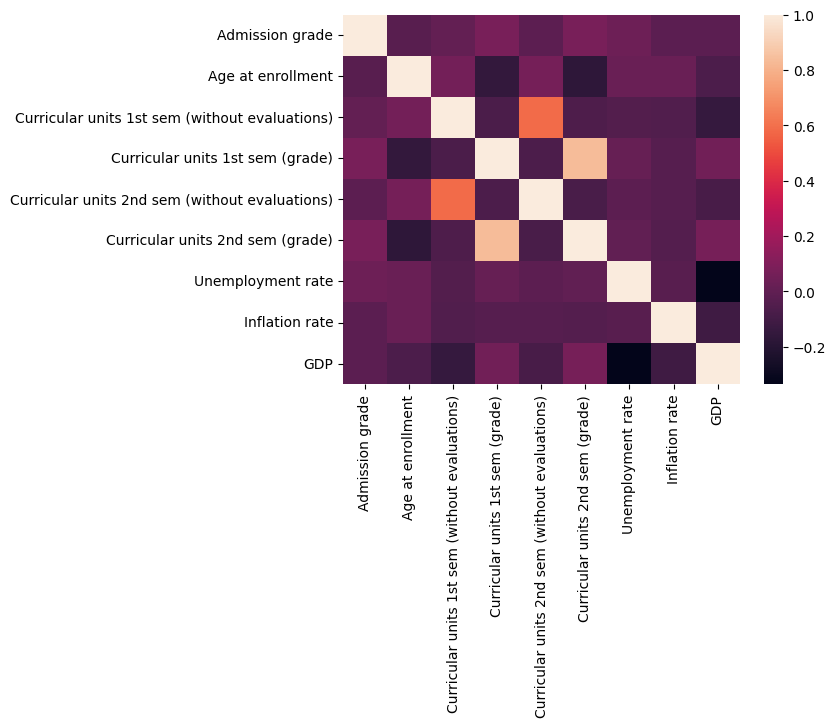

In [19]:
df_num_corr_mat = df[list_numericals_modded].corr()
sns.heatmap(df_num_corr_mat)

In [20]:
df_num_corr_mat 

#Multicollinearity has decreased substantially by cutting out a lot of the 1st/2nd semester credit columns
#Might have to cut out either 1st or 2nd semester grades/units because they do correlate with each other

,Admission grade,Age at enrollment,Curricular units 1st sem (without evaluations),Curricular units 1st sem (grade),Curricular units 2nd sem (without evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
Admission grade,1.000000,-0.029915,0.009033,0.073868,-0.013254,0.074402,0.038756,-0.021624,-0.019519
Age at enrollment,-0.029915,1.000000,0.057470,-0.156616,0.061654,-0.173419,0.025018,0.025377,-0.064678
Curricular units 1st sem (without evaluations),0.009033,0.057470,1.000000,-0.071660,0.583261,-0.061482,-0.045144,-0.052534,-0.144673
Curricular units 1st sem (grade),0.073868,-0.156616,-0.071660,1.000000,-0.066076,0.837170,0.014821,-0.033904,0.054801
Curricular units 2nd sem (without evaluations),-0.013254,0.061654,0.583261,-0.066076,1.000000,-0.079216,-0.013960,-0.034391,-0.080292
Curricular units 2nd sem (grade),0.074402,-0.173419,-0.061482,0.837170,-0.079216,1.000000,0.001462,-0.038166,0.071269
Unemployment rate,0.038756,0.025018,-0.045144,0.014821,-0.013960,0.001462,1.000000,-0.028885,-0.335178
Inflation rate,-0.021624,0.025377,-0.052534,-0.033904,-0.034391,-0.038166,-0.028885,1.000000,-0.112295
GDP,-0.019519,-0.064678,-0.144673,0.054801,-0.080292,0.071269,-0.335178,-0.112295,1.000000


In [21]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,14.000000,0,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,13.428571,0,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,12.333333,0,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,13.600000,0,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,12.000000,0,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,14.912500,0,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,13.800000,0,12.000000,0,9.4,-0.8,-3.12,Graduate


In [22]:
marital_status_hist = px.histogram(df, x = "Marital status")
marital_status_hist.show()

#Positively skewed heavily, makes sense because these are students 

In [23]:
GDP_UR_scatter = px.scatter(df, x = "GDP", y = "Unemployment rate")
GDP_UR_scatter.show()

<Axes: xlabel='Application mode', ylabel='count'>

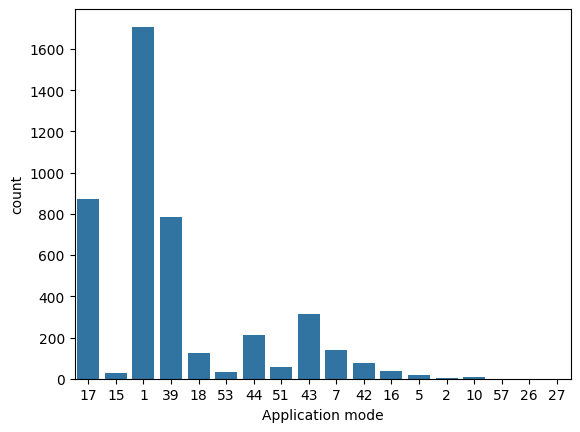

In [24]:
sns.countplot(df,x = "Application mode")

<Axes: xlabel='Application order', ylabel='count'>

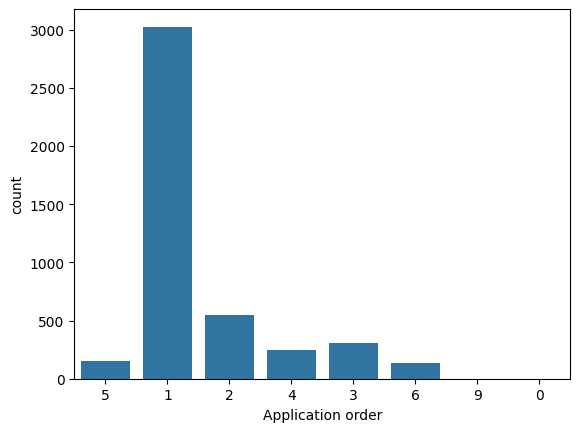

In [25]:
sns.countplot(df, x = "Application order")

<Axes: xlabel='Course', ylabel='count'>

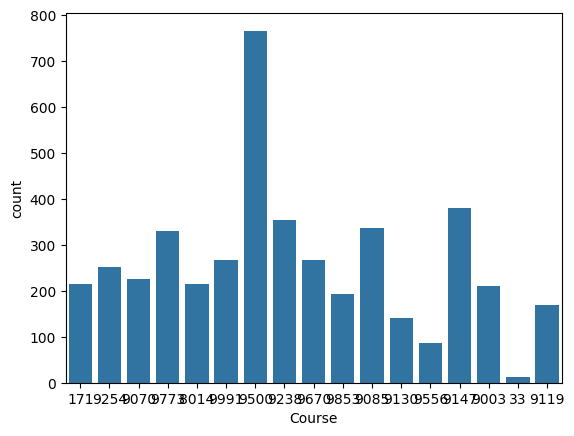

In [26]:
sns.countplot(df, x = "Course")

<Axes: xlabel='Target', ylabel='percent'>

/home/iain/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning:

Glyph 9 (	) missing from current font.

/home/iain/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



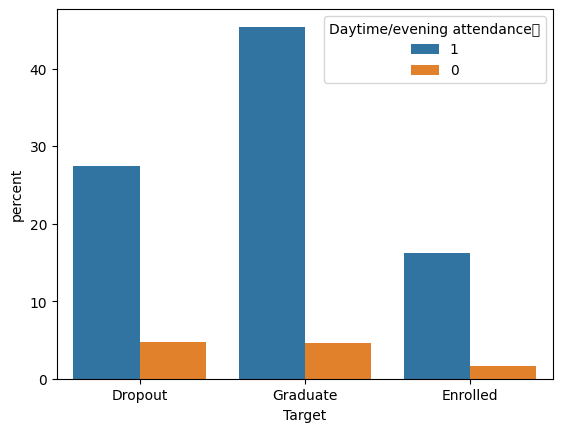

In [27]:
sns.countplot(df, x = "Target", hue = "Daytime/evening attendance\t", stat = "percent")
#Highest proportion of those that attended daytime classes tended to drop out, very interesting 

In [28]:
admission_grade_target_boxplot = px.box(df, x = "Admission grade", facet_col = "Target")
admission_grade_target_boxplot.show()

In [29]:
admission_grade_gender_boxplot = px.box(df, x = "Admission grade", facet_col = "Gender")
admission_grade_gender_boxplot.show()

In [30]:
curriculum_credits_1st_hist = px.box(df, x = "Curricular units 1st sem (grade)")
curriculum_credits_1st_hist.show()

In [31]:
curriculum_credits_2nd_hist = px.box(df, x = "Curricular units 2nd sem (grade)")
curriculum_credits_2nd_hist.show()

In [32]:
inflation_grade_scatter = px.histogram(df,facet_col = "Inflation rate", x = "Curricular units 1st sem (grade)", histnorm="probability density")
inflation_grade_scatter.show()

In [33]:
target_first_sem_hist = px.histogram(df, x = "Curricular units 1st sem (grade)", facet_col = "Target")
target_first_sem_hist.show()

#Those who did not take units were more likely to dropout 

<Axes: xlabel='Nacionality', ylabel='percent'>

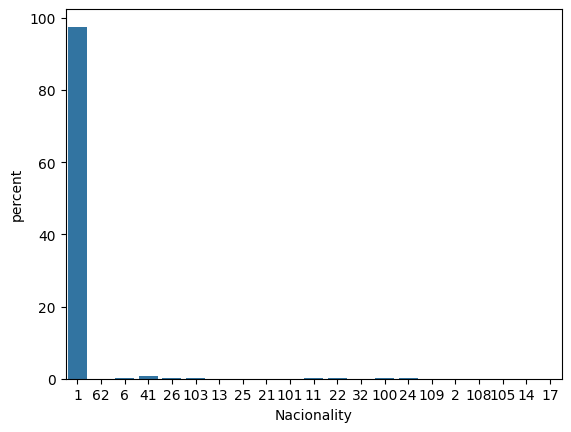

In [34]:
sns.countplot(df, x = "Nacionality", stat = "percent")
#Severe skew with most students being portugueseee

In [35]:
age_at_enrollment_hist = px.histogram(df, x = "Age at enrollment", histnorm = "percent")
age_at_enrollment_hist

<Axes: xlabel='Displaced', ylabel='count'>

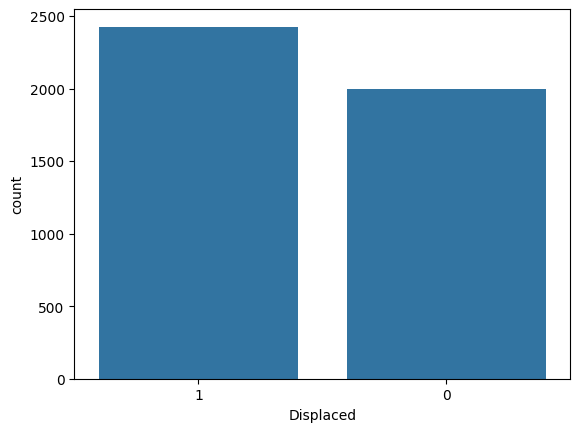

In [36]:
sns.countplot(df, x = "Displaced")

<Axes: xlabel='Educational special needs', ylabel='count'>

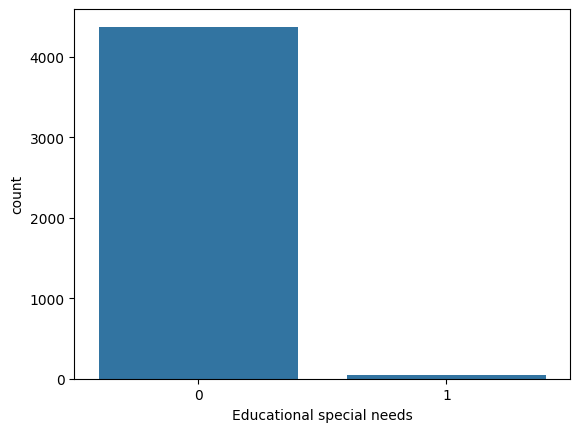

In [37]:
sns.countplot(df, x = "Educational special needs")

<Axes: xlabel='Debtor', ylabel='count'>

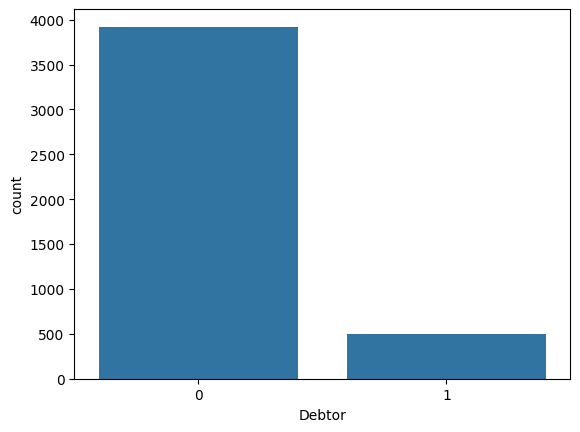

In [38]:
sns.countplot(df, x = "Debtor")

<Axes: xlabel='Target', ylabel='count'>

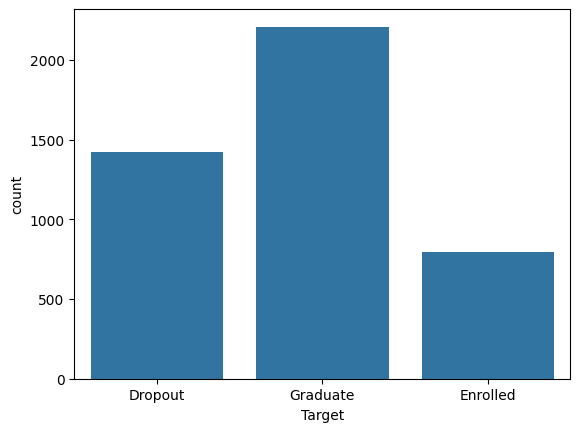

In [39]:
sns.countplot(df, x = "Target")

In [40]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,14.000000,0,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,13.428571,0,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,12.333333,0,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,13.600000,0,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,12.000000,0,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,14.912500,0,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,13.800000,0,12.000000,0,9.4,-0.8,-3.12,Graduate


In [41]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,TargetEncoder

In [42]:
OH_Encoder = OneHotEncoder(sparse_output = False)

binary_columns = ["Daytime/evening attendance\t","Displaced","Educational special needs", "Debtor", 
                  "Tuition fees up to date","Gender","Scholarship holder","International"]

binary_columns_encoded = OH_Encoder.fit_transform(df[binary_columns])
binary_columns_encoded_df = pd.DataFrame(binary_columns_encoded,columns = OH_Encoder.get_feature_names_out(binary_columns))

binary_columns_encoded_df

df_encoded = pd.concat([df,binary_columns_encoded_df],axis = 1)
df_encoded = df_encoded.drop(binary_columns,axis = 1)

In [43]:
df_encoded

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Daytime/evening attendance\t_0,Daytime/evening attendance\t_1,Displaced_0,Displaced_1,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,1,17,5,171,1,122.0,1,19,12,5,9,127.3,20,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,15,1,9254,1,160.0,1,1,3,3,3,142.5,19,14.000000,0,13.666667,0,13.9,-0.3,0.79,Graduate,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1,1,5,9070,1,122.0,1,37,37,9,9,124.8,19,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1,17,2,9773,1,122.0,1,38,37,5,3,119.6,20,13.428571,0,12.400000,0,9.4,-0.8,-3.12,Graduate,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2,39,1,8014,1,100.0,1,37,38,9,9,141.5,45,12.333333,0,13.000000,0,13.9,-0.3,0.79,Graduate,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,125.0,1,1,1,5,4,122.2,19,13.600000,0,12.666667,0,15.5,2.8,-4.06,Graduate,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4420,1,1,2,9773,1,120.0,105,1,1,9,9,119.0,18,12.000000,0,11.000000,0,11.1,0.6,2.02,Dropout,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4421,1,1,1,9500,1,154.0,1,37,37,9,9,149.5,30,14.912500,0,13.500000,0,13.9,-0.3,0.79,Dropout,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4422,1,1,1,9147,1,180.0,1,37,37,7,4,153.8,20,13.800000,0,12.000000,0,9.4,-0.8,-3.12,Graduate,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [44]:
O_Encoder = OrdinalEncoder()

ordinal_columns = ["Application order"]

ordinal_columns_encoded = O_Encoder.fit_transform(df[ordinal_columns])
ordinal_columns_encoded_df = pd.DataFrame(ordinal_columns_encoded,columns=O_Encoder.get_feature_names_out(ordinal_columns))

ordinal_columns_encoded_df = ordinal_columns_encoded_df.astype({"Application order" : "int64"})
df_encoded = df.drop(ordinal_columns,axis = 1)
df_encoded = pd.concat([df_encoded,ordinal_columns_encoded_df], axis = 1)

In [45]:
df_encoded

,Marital status,Application mode,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Application order
0,1,17,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout,5
1,1,15,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,14.000000,0,13.666667,0,13.9,-0.3,0.79,Graduate,1
2,1,1,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0.000000,0,0.000000,0,10.8,1.4,1.74,Dropout,5
3,1,17,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,13.428571,0,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,12.333333,0,13.000000,0,13.9,-0.3,0.79,Graduate,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,13.600000,0,12.666667,0,15.5,2.8,-4.06,Graduate,6
4420,1,1,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,12.000000,0,11.000000,0,11.1,0.6,2.02,Dropout,2
4421,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,14.912500,0,13.500000,0,13.9,-0.3,0.79,Dropout,1
4422,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,13.800000,0,12.000000,0,9.4,-0.8,-3.12,Graduate,1


In [46]:
'''
-Nominal Data (Unordered)
    -   Marital status (Few subcategories) --> Frequency Encoding 
    -   Application mode --> Frequency Encoding 
    -   Course --> Target Encoding 
    -   Nacionality --> Target Encoding 
    -   Mother's qualification --> Frequency Encoding 
    -   Father's qualification --> Frequency Encoding 
    -   Mother's occupation --> Target Encoding 
    -   Father's occupation --> Target Encoding 
-Ordinal Data (Ordered) --> DONE 
    - Application order --> Ordinal Encoding (DONE)
'''

"\n-Nominal Data (Unordered)\n    -   Marital status (Few subcategories) --> Frequency Encoding \n    -   Application mode --> Frequency Encoding \n    -   Course --> Target Encoding \n    -   Nacionality --> Target Encoding \n    -   Mother's qualification --> Frequency Encoding \n    -   Father's qualification --> Frequency Encoding \n    -   Mother's occupation --> Target Encoding \n    -   Father's occupation --> Target Encoding \n-Ordinal Data (Ordered) --> DONE \n    - Application order --> Ordinal Encoding (DONE)\n"

In [47]:
df_encoded = df_encoded.astype({"Target" : "string"})

In [48]:
def mean_encode(df,column):
    mean_encoded_dict = df.groupby([column])['Target'].mean().to_dict()
    print(mean_encoded_dict)

In [138]:
def replace_with_dict(x,dictionary):
    return dictionary.get(x,x)

In [143]:
def freq_encode(df,columns):
    for column in columns:
        df_dummy_dict = df.groupby(column)["Target"].count().to_dict()
        df[column] = df[column].apply(lambda x: replace_with_dict(x,df_dummy_dict))
    return df

In [146]:
frequency_columns = ["Marital status", "Application mode", "Mother's qualification", "Father's qualification"]
df_encoded = freq_encode(df_encoded,frequency_columns)

In [148]:
def target_encode(df,columns):
    for column in columns:
        df_dummy_dict = df.groupby(column)["Target"].mean().to_dict()
        print(df_dummy_dict)

In [150]:
df_trial = target_encode(df_encoded, ["Course"])

#Need to encode target into 1-2-3 

TypeError: agg function failed [how->mean,dtype->string]